# **Lab Excercise-06:Developing a Convolutional Neural Network (CNN) with Transfer Learning for Image Recognition**

* Created By : Blessy Louis (2348416)
* Created On : 1.09.2024
* Submitted On: 2.09.2024

## **Import Libraries**
### 1. `tensorflow`:
   - **TensorFlow**: A deep learning framework for building and training machine learning models.

### 2. `tensorflow.keras.preprocessing.image.ImageDataGenerator`:
   - **ImageDataGenerator**: A class for generating batches of image data with real-time data augmentation.

### 3. `tensorflow.keras.applications.VGG16`:
   - **VGG16**: A pre-trained convolutional neural network model used for transfer learning.

### 4. `tensorflow.keras.models.Model`:
   - **Model**: A class for creating custom models by chaining layers together.

### 5. `tensorflow.keras.layers.Dense`:
   - **Dense Layer**: A fully connected neural network layer.

### 6. `tensorflow.keras.layers.Flatten`:
   - **Flatten Layer**: A layer that flattens the input into a 1D array.

### 7. `tensorflow.keras.layers.Dropout`:
   - **Dropout Layer**: A regularization technique to prevent overfitting by randomly setting a fraction of input units to zero.

### 8. `tensorflow.keras.optimizers.Adam`:
   - **Adam Optimizer**: An optimization algorithm that combines the best properties of the AdaGrad and RMSProp algorithms.

### 9. `os`:
   - **os**: A standard Python library for interacting with the operating system (e.g., file handling).

### 10. `matplotlib.pyplot`:
   - **Matplotlib**: A plotting library for creating visualizations, like charts and graphs.

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
import os
import matplotlib.pyplot as plt

## **Load Dataset**


In [ ]:
# Set up paths
main_folder = 'C:/Users/Admin/Downloads/weather/dataset'

# Parameters
img_height, img_width = 224, 224
batch_size = 32

# List the class names (i.e., folder names inside the dataset folder)
classes = os.listdir(main_folder)
num_classes = len(classes)
print(num_classes)

11


Generating Train and Test set

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # Split data into training and validation sets
)

train_generator = train_datagen.flow_from_directory(
    main_folder,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'  # Use the training subset
)

validation_generator = train_datagen.flow_from_directory(
    main_folder,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'  # Use the validation subset
)


Found 5493 images belonging to 11 classes.
Found 1369 images belonging to 11 classes.


In [ ]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers on top of the base model
x = Flatten()(base_model.output)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
output_layer = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output_layer)

model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 11s 0us/step


In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=10
)


Epoch 1/10


C:\Users\Admin\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


171/171 ━━━━━━━━━━━━━━━━━━━━ 6080s 35s/step - accuracy: 0.3504 - loss: 2.7500 - val_accuracy: 0.6012 - val_loss: 1.0760
Epoch 2/10
  1/171 ━━━━━━━━━━━━━━━━━━━━ 48:48 17s/step - accuracy: 0.5000 - loss: 1.4906

C:\Users\Admin\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


171/171 ━━━━━━━━━━━━━━━━━━━━ 37s 115ms/step - accuracy: 0.5000 - loss: 1.4906 - val_accuracy: 0.6000 - val_loss: 1.0282
Epoch 3/10
171/171 ━━━━━━━━━━━━━━━━━━━━ 4199s 25s/step - accuracy: 0.5591 - loss: 1.2478 - val_accuracy: 0.6935 - val_loss: 0.8672
Epoch 4/10
171/171 ━━━━━━━━━━━━━━━━━━━━ 74s 173ms/step - accuracy: 0.6250 - loss: 0.9476 - val_accuracy: 0.6800 - val_loss: 0.9860
Epoch 5/10
171/171 ━━━━━━━━━━━━━━━━━━━━ 4384s 26s/step - accuracy: 0.5984 - loss: 1.1154 - val_accuracy: 0.7351 - val_loss: 0.8227
Epoch 6/10
171/171 ━━━━━━━━━━━━━━━━━━━━ 35s 108ms/step - accuracy: 0.8125 - loss: 0.6929 - val_accuracy: 0.6400 - val_loss: 0.8642
Epoch 7/10
171/171 ━━━━━━━━━━━━━━━━━━━━ 33698s 198s/step - accuracy: 0.6311 - loss: 1.0263 - val_accuracy: 0.7299 - val_loss: 0.7450
Epoch 8/10
171/171 ━━━━━━━━━━━━━━━━━━━━ 32s 95ms/step - accuracy: 0.6562 - loss: 0.9653 - val_accuracy: 0.7600 - val_loss: 0.7888
Epoch 9/10
171/171 ━━━━━━━━━━━━━━━━━━━━ 3549s 21s/step - accuracy: 0.6672 - loss: 0.9459 - va

In [ ]:
loss, accuracy = model.evaluate(validation_generator)
print(f'Validation Loss: {loss}')
print(f'Validation Accuracy: {accuracy}')


43/43 ━━━━━━━━━━━━━━━━━━━━ 1021s 23s/step - accuracy: 0.7443 - loss: 0.7367
Validation Loss: 0.7459837794303894
Validation Accuracy: 0.7428780198097229


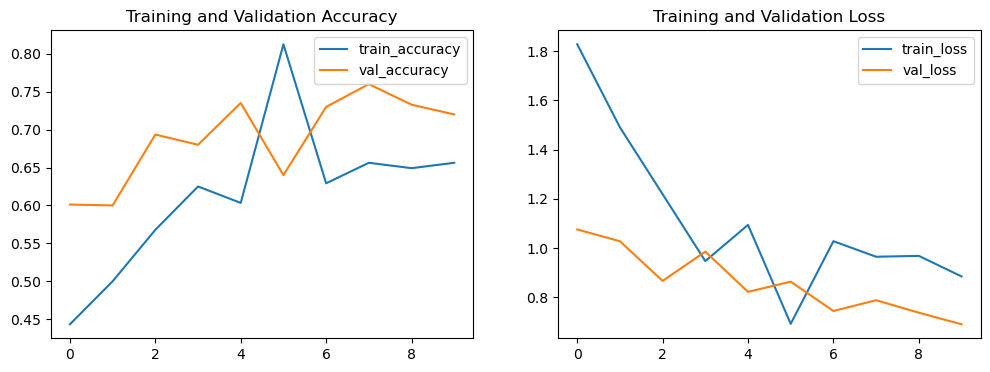

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()


In [ ]:
model.save('weather_classification_model.h5')


## **Conclusion**

The validation metrics are typically used to assess the performance of a machine learning model on a validation dataset, which is separate from the training data.

1. **Validation Loss: 0.746**
   - The validation loss is a measure of how well the model's predictions match the actual outcomes on the validation dataset. A lower loss value generally indicates better model performance. However, whether 0.746 is a good loss depends on the specific problem, the loss function used, and the context of the model. If this value is decreasing over time during training, it suggests that the model is learning.

2. **Validation Accuracy: 0.743 (or 74.3%)**
   - The validation accuracy represents the percentage of correct predictions made by the model on the validation dataset. An accuracy of 74.3% means that the model correctly predicted the outcome 74.3% of the time. Whether this is a good accuracy depends on the complexity of the problem and the baseline performance (e.g., random guessing or a simple heuristic).

### Interpretation
- **Balance between Loss and Accuracy**: Generally,the validation loss to be low and the accuracy to be high. In this case, the validation loss of 0.746 and accuracy of 74.3% suggest that the model is performing reasonably well, but there may still be room for improvement.
